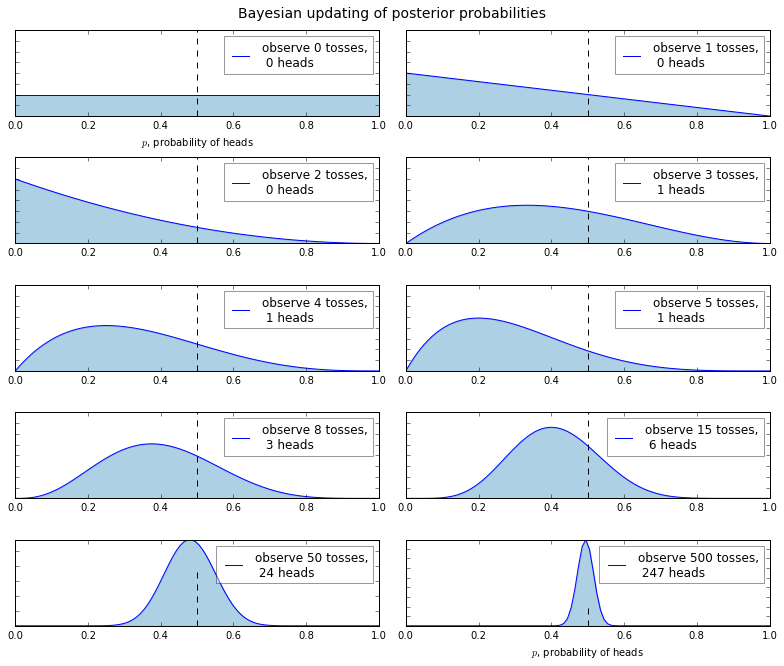

In [8]:
# Example: Mandatory coin-flip example

%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta

n_trials = [0,1,2,3,4,5,8,15,50,500]

data = stats.bernoulli.rvs(0.5, size=n_trials[-1])

x = np.linspace(0,1,100)

for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k+1)
    plt.xlabel("$p$, probability of heads") if k in [0, 0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    
    y = dist.pdf(x, 1 + heads, 1 + N - heads)

    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
    
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)

plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

In [7]:
# class bernoulli_gen(binom_gen)
#  |  A Bernoulli discrete random variable.
#  |  
#  |  
#  |  Notes
#  |  -----
#  |  The probability mass function for `bernoulli` is::
#  |  
#  |     bernoulli.pmf(k) = 1-p  if k = 0
#  |                      = p    if k = 1
#  |  
#  |  for ``k`` in ``{0, 1}``.
#  |
#  |  f(k;p) = p^k(1-p)^{1-k}
#  |  
#  |  `bernoulli` takes ``p`` as shape parameter.
#
# rvs(*args, **kwargs) method of scipy.stats._discrete_distns.bernoulli_gen instance
#     Random variates of given type.
    
#     Parameters
#     ----------
#     arg1, arg2, arg3,... : array_like
#         The shape parameter(s) for the distribution (see docstring of the
#         instance object for more information).
#     loc : array_like, optional
#         Location parameter (default=0).
#     size : int or tuple of ints, optional
#         Defining number of random variates (Default is 1).  Note that `size`
#         has to be given as keyword, not as positional argument.
#     random_state : None or int or ``np.random.RandomState`` instance, optional
#         If int or RandomState, use it for drawing the random variates.
#         If None, rely on ``self.random_state``.
#         Default is None.
    
#     Returns
#     -------
#     rvs : ndarray or scalar
#         Random variates of given `size`.
stats.bernoulli.rvs(0.5, size=10)

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [14]:
# class beta_gen(scipy.stats._distn_infrastructure.rv_continuous)
#    A beta continuous random variable.
#  |  The probability density function for `beta` is::
#  |  
#  |                          gamma(a+b) * x**(a-1) * (1-x)**(b-1)
#  |      beta.pdf(x, a, b) = ------------------------------------
#  |                                   gamma(a)*gamma(b)
#  |  
#  |  for ``0 < x < 1``, ``a > 0``, ``b > 0``, where ``gamma(z)`` is the gamma
#  |  function (`scipy.special.gamma`).
#  |  
#  |  `beta` takes ``a`` and ``b`` as shape parameters.
dist = stats.beta

x = np.linspace(0,1,10)
N = 8
heads = stats.bernoulli.rvs(0.5, size=N).sum()
print(heads)

#     pdf(x, *args, **kwds) method of scipy.stats._continuous_distns.beta_gen instance
#     Probability density function at x of the given RV.
    
#     Parameters
#     ----------
#     x : array_like
#         quantiles
#     arg1, arg2, arg3,... : array_like
#         The shape parameter(s) for the distribution (see docstring of the
#         instance object for more information)
#     loc : array_like, optional
#         location parameter (default=0)
#     scale : array_like, optional
#         scale parameter (default=1)
    
#     Returns
#     -------
#     pdf : ndarray
#         Probability density function evaluated at x
dist.pdf(x, 1 + heads, 1 + N - heads)

6


array([  0.00000000e+00,   3.74662683e-04,   1.83584715e-02,
         1.53635117e-01,   5.99460293e-01,   1.46352611e+00,
         2.45816187e+00,   2.75491813e+00,   1.53461835e+00,
         0.00000000e+00])

## Example: Bug, or just sweet, unintended feature?

$P(A|X) = \frac{P(X|A)P(A)}{P(X)}$

$P(X) = P(X \mathrm{and} A) + P(X \mathrm{and} \sim A)$

$ = P(X|A)P(A) + P(X|\sim A)P(\sim A)$

Let $P(A) = p$.

$P(X) = P(X|A)p + P(X|\sim A)(1 - p)$

Let $P(X|\sim A) = 0.5$.

Since $P(X|A) = 1$ then,

$P(A|X) = \frac{1 \cdot p}{1 \cdot p + 0.5 \cdot (1 - p)}$

$ = \frac{2p}{1 + p}$

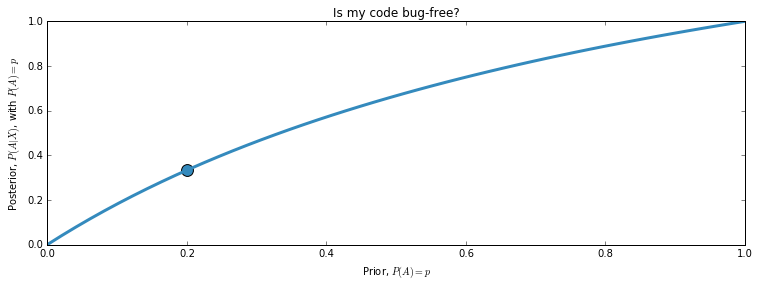

In [15]:
figsize(12.5, 4)
p = np.linspace(0,1,50)

plt.plot(p, 2 * p / (1 + p), color="#348ABD", lw=3)
plt.scatter(0.2, 2 * (0.2) / 1.2, s=140, c="#348ABD")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Prior, $P(A) = p$")
plt.ylabel("Posterior, $P(A|X)$, with $P(A) = p$")
plt.title("Is my code bug-free?")

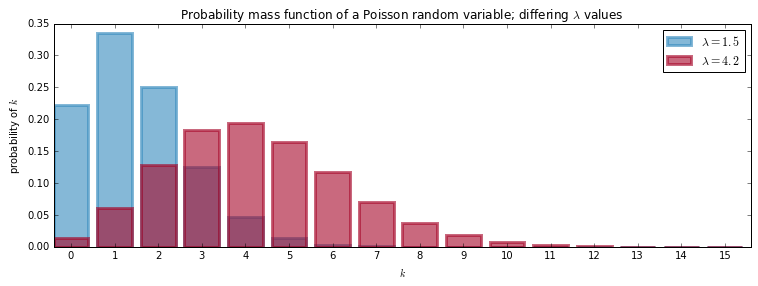

In [16]:
# Discrete Probability Distributions

figsize(12.5, 4)
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]

colours = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
        edgecolor=colours[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
        edgecolor=colours[1], lw="3")

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable; differing \
$\lambda$ values")

In [18]:
# class poisson_gen(scipy.stats._distn_infrastructure.rv_discrete)
#  |  A Poisson discrete random variable.
#  |  
#  |  Notes
#  |  -----
#  |  The probability mass function for `poisson` is::
#  |  
#  |      poisson.pmf(k) = exp(-mu) * mu**k / k!
#  |  
#  |  for ``k >= 0``.
#  |  
#  |  `poisson` takes ``mu`` as shape parameter.
poi = stats.poisson

a = np.arange(16)

poi.pmf(a,1.5)

array([  2.23130160e-01,   3.34695240e-01,   2.51021430e-01,
         1.25510715e-01,   4.70665182e-02,   1.41199554e-02,
         3.52998886e-03,   7.56426185e-04,   1.41829910e-04,
         2.36383183e-05,   3.54574774e-06,   4.83511056e-07,
         6.04388819e-08,   6.97371715e-09,   7.47183980e-10,
         7.47183980e-11])

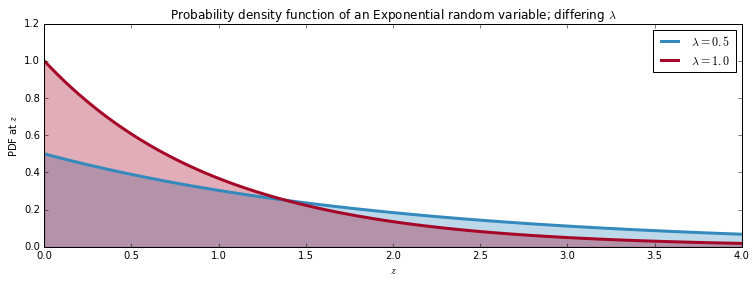

In [21]:
# Continuous Probability Distributions

a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1. / l), lw=3, color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1. / l), color=c, alpha=.33)

plt.legend()
plt.ylabel("PDF at $z$")
plt.xlabel("$z$")
plt.ylim(0, 1.2)
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");

In [23]:
# class expon_gen(scipy.stats._distn_infrastructure.rv_continuous)
#  |  An exponential continuous random variable.
#  |  -----
#  |  The probability density function for `expon` is::
#  |  
#  |      expon.pdf(x) = exp(-x)
#  |  
#  |  for ``x >= 0``.
#  |  
#  |  %(after_notes)s
#  |  
#  |  A common parameterization for `expon` is in terms of the rate parameter
#  |  ``lambda``, such that ``pdf = lambda * exp(-lambda * x)``. This
#  |  parameterization corresponds to using ``scale = 1 / lambda``.

l = 0.5

a = np.linspace(0, 4, 40)

expo.pdf(a, scale=1. / l)

array([ 0.5       ,  0.47500534,  0.45126015,  0.42870196,  0.40727144,
        0.38691222,  0.36757074,  0.34919613,  0.33174005,  0.31515659,
        0.29940213,  0.28443522,  0.2702165 ,  0.25670856,  0.24387587,
        0.23168468,  0.22010293,  0.20910013,  0.19864736,  0.18871711,
        0.17928327,  0.17032102,  0.16180679,  0.15371818,  0.14603391,
        0.13873378,  0.13179857,  0.12521005,  0.11895088,  0.11300461,
        0.10735559,  0.10198895,  0.0968906 ,  0.0920471 ,  0.08744573,
        0.08307438,  0.07892154,  0.07497631,  0.0712283 ,  0.06766764])